# Chapter 1_3 协方差分析
----
author: W.Y.  
first_edition: 2020/1/15  
last_edition: 2020/1/19  
description: 王汉生老师书的第三章，协方差分析的python极简实现  

----

In [34]:
# 导入模块
import pandas as pd
import matplotlib.pyplot as plt  # 画图模块
import matplotlib
import seaborn as sns
import statsmodels.formula.api as smf  
import statsmodels.api as sma
import lmdiag  

In [3]:
# 导入数据

data = pd.read_csv('E:\Data Mining\SimplePython\Chapter 1 从R到Python\CH 1_3 协方差分析\CH 1_3 data teaching.csv', encoding='gbk')

In [4]:
# 查看数据
data.head()

,title,gender,student,year,semester,size,score
0,副教授,女,MBA,2002,秋季,114,3.175
1,副教授,女,MBA,2002,秋季,88,3.523
2,副教授,女,MBA,2003,秋季,83,4.458
3,副教授,女,MBA,2002,秋季,66,3.470
4,副教授,女,MBA,2003,秋季,46,4.630


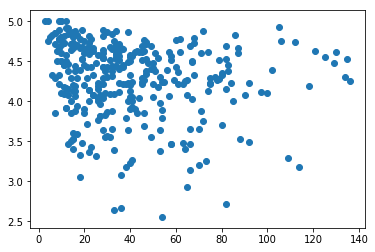

In [6]:
# 散点图
plt.scatter(data['size'], data['score'])

# 最简单的散点图，什么都不标注。其它设置可以看看第一章，这里就不重复了。

In [13]:
bins = [0,20,40,60,80,100,120,140]
data['size_group'] = pd.cut(data['size'],bins)

In [14]:
data['size_group'].value_counts(sort=False)

(0, 20]        98
(20, 40]      112
(40, 60]       59
(60, 80]       40
(80, 100]      17
(100, 120]      7
(120, 140]      7
Name: size_group, dtype: int64

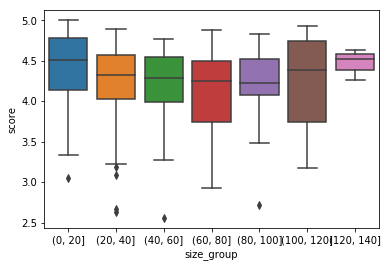

In [17]:
sns.boxplot(data['size_group'], data['score'])


In [19]:
# 赋值新变量
data['group'] = data['size'].apply(lambda x: 1 if x<=20 else 0)


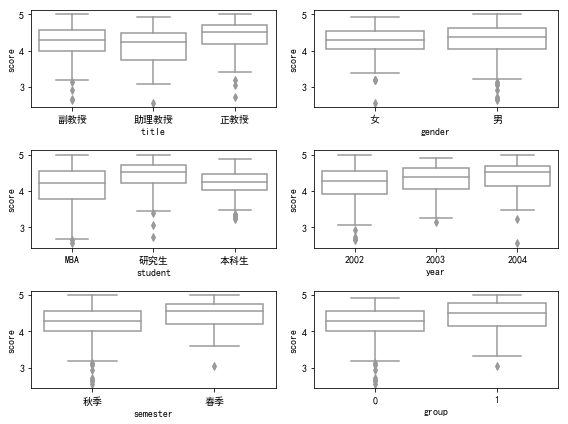

In [32]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 为了画图能够显示中文，否则中文会变成乱码。
plt.rcParams['axes.unicode_minus']=False


fig = plt.figure(figsize=(8, 6))
sns.boxplot(data['title'],data['score'], color='white', 
            ax=plt.subplot(3,2,1))  # 设置3×2的画布，选定第1副子图，即第一行第一个。下同
sns.boxplot(data['gender'], data['score'], color='white', ax=plt.subplot(3,2,2))
sns.boxplot(data['student'],data['score'], color='white', ax=plt.subplot(3,2,3))
sns.boxplot(data['year'],data['score'], color='white',ax=plt.subplot(3,2,4))
sns.boxplot(data['semester'],data['score'], color='white',ax=plt.subplot(3,2,5))
sns.boxplot(data['group'],data['score'], color='white',ax=plt.subplot(3,2,6))
fig.tight_layout()

In [36]:
model1 = smf.ols('score ~ C(group) + size',
                 data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     6.742
Date:                Mon, 20 Jan 2020   Prob (F-statistic):            0.00135
Time:                        17:31:29   Log-Likelihood:                -223.31
No. Observations:                 340   AIC:                             452.6
Df Residuals:                     337   BIC:                             464.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.2367      0.067     63.530

In [43]:
model1.fittedvalues

0      4.177635
1      4.191116
2      4.193709
3      4.202523
4      4.212894
5      4.213412
6      4.217042
7      4.220671
8      4.221190
9      4.221190
10     4.221708
11     4.222227
12     4.222227
13     4.222745
14     4.224819
15     4.225338
16     4.411417
17     4.411936
18     4.412454
19     4.414528
20     4.418676
21     4.167265
22     4.169858
23     4.174006
24     4.175561
25     4.178672
26     4.180228
27     4.181783
28     4.186450
29     4.189042
         ...   
310    4.414010
311    4.414010
312    4.414010
313    4.414010
314    4.414528
315    4.414528
316    4.415047
317    4.415047
318    4.415047
319    4.415565
320    4.415565
321    4.415565
322    4.415565
323    4.416084
324    4.416602
325    4.416602
326    4.416602
327    4.416602
328    4.416602
329    4.416602
330    4.416602
331    4.417121
332    4.417121
333    4.417121
334    4.418158
335    4.418158
336    4.418676
337    4.419713
338    4.419713
339    4.420232
Length: 340, dtype: floa

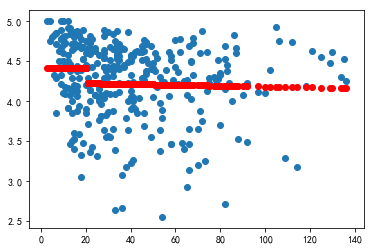

In [50]:
plt.scatter(data['size'], data['score'])
plt.scatter(data['size'], model1.fittedvalues, c='red')

In [52]:
model2 = smf.ols('score ~ C(group)*size',
                 data).fit()
print(sma.stats.anova_lm(model2, typ=3))

                   sum_sq     df            F         PR(>F)
Intercept      870.978185    1.0  4083.196145  4.600881e-190
C(group)         3.639469    1.0    17.062042   4.570737e-05
size             0.002311    1.0     0.010834   9.171621e-01
C(group):size    2.372375    1.0    11.121829   9.484975e-04
Residual        71.671470  336.0          NaN            NaN


In [53]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     8.337
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.31e-05
Time:                        18:59:54   Log-Likelihood:                -217.77
No. Observations:                 340   AIC:                             443.5
Df Residuals:                     336   BIC:                             458.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.2166      0

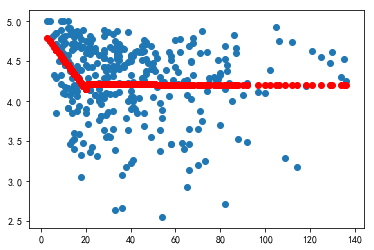

In [54]:
plt.scatter(data['size'], data['score'])
plt.scatter(data['size'], model2.fittedvalues, c='red')

In [56]:
model3a = smf.ols('score ~ C(title) + C(gender) + C(student) + '
                  'C(year) + C(semester) + C(group)*size', data).fit()
print(sma.stats.anova_lm(model3a, typ=3))

                   sum_sq     df           F         PR(>F)
Intercept      182.631510    1.0  978.971002  1.744515e-100
C(title)         1.938447    2.0    5.195388   6.007221e-03
C(gender)        0.047006    1.0    0.251971   6.160271e-01
C(student)       3.242909    2.0    8.691582   2.098551e-04
C(year)          3.511289    2.0    9.410889   1.061371e-04
C(semester)      0.011929    1.0    0.063945   8.005250e-01
C(group)         2.604529    1.0   13.961217   2.200647e-04
size             0.105781    1.0    0.567024   4.519841e-01
C(group):size    2.010103    1.0   10.774881   1.139731e-03
Residual        61.189898  328.0         NaN            NaN


In [57]:
print(model3a.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     7.707
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.23e-12
Time:                        19:30:55   Log-Likelihood:                -190.90
No. Observations:                 340   AIC:                             405.8
Df Residuals:                     328   BIC:                             451.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.9589      0

In [58]:
model3b = smf.ols('score ~ C(title) + C(student) + '
                  'C(year) + C(group)*size', data).fit()
print(sma.stats.anova_lm(model3b, typ=3))

                   sum_sq     df            F         PR(>F)
Intercept      416.906120    1.0  2246.554354  2.542363e-149
C(title)         3.568658    2.0     9.615096   8.736872e-05
C(student)       3.242879    2.0     8.737343   2.006674e-04
C(year)          3.566751    2.0     9.609958   8.779395e-05
C(group)         2.567771    1.0    13.836779   2.342672e-04
size             0.086642    1.0     0.466885   4.949033e-01
C(group):size    1.995607    1.0    10.753594   1.151792e-03
Residual        61.240014  330.0          NaN            NaN


In [59]:
print(model3b.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     9.440
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.42e-13
Time:                        19:36:07   Log-Likelihood:                -191.03
No. Observations:                 340   AIC:                             402.1
Df Residuals:                     330   BIC:                             440.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.9161      0

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

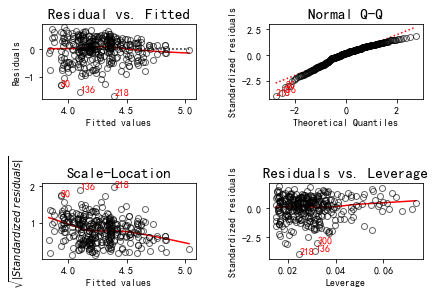

In [60]:
lmdiag.plot(model3b)



In [61]:
print('AIC值：', model3b.aic,
      '\nBIC值：', model3b.bic)



AIC值： 402.06896312226263 
BIC值： 440.3584192983647


In [62]:
data_new = pd.read_csv('E:\Data Mining\SimplePython\Chapter 1 从R到Python\CH 1_3 协方差分析\CH 1_3 data new.csv', encoding='gbk')

In [63]:
data_new['group'] = data_new['size'].apply(lambda x: 1 if x<=20 else 0)


In [64]:
data_new['predict_score'] = model3b.predict(data_new)

In [65]:
print(data_new)

  title gender student  year semester  size  group  predict_score
0   副教授      女     MBA  2002       秋季   114      0       4.002468
1   副教授      男     研究生  2004       秋季    15      1       4.482488
2  助理教授      女     本科生  2004       秋季    38      0       4.185510
3   正教授      男     研究生  2002       春季    40      0       4.362787
4   正教授      男     研究生  2003       春季    21      0       4.495394


In [68]:
data['residual'] = model3b.resid


In [71]:
print(data.head())

  title gender student  year semester  size  score  size_group  group  \
0   副教授      女     MBA  2002       秋季   114  3.175  (100, 120]      0   
1   副教授      女     MBA  2002       秋季    88  3.523   (80, 100]      0   
2   副教授      女     MBA  2003       秋季    83  4.458   (80, 100]      0   
3   副教授      女     MBA  2002       秋季    66  3.470    (60, 80]      0   
4   副教授      女     MBA  2003       秋季    46  4.630    (40, 60]      0   

   residual  
0 -0.827468  
1 -0.459766  
2  0.332018  
3 -0.496095  
4  0.532056  
